Disclaimer :  This is purely an assigned research thus use this with a word of caution from my side

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polyphase
import numpy as np
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [3]:
# Figuring out upper hull using the normals
from scipy.spatial import ConvexHull

def get_lower_convexhull(points):
    inf_ind = np.shape(points)[0]
    base_points = points[:,:-1].mean(axis=0)
    inf_height = 1e10*abs(max(points[:,-1]))
    p_inf = np.hstack((base_points,inf_height))
    points_inf = np.vstack((points,p_inf))
    hull = ConvexHull(points_inf)
    lower = ~(hull.simplices==inf_ind).any(axis=1)
    lower_hull = hull.simplices[lower]
    
    return lower_hull,points_inf


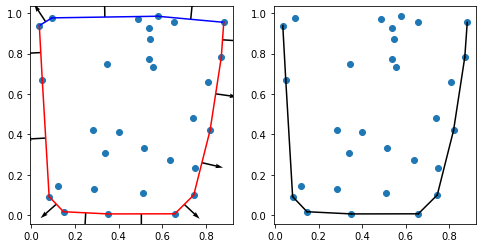

In [4]:
# 2D example of Upper Hull and Lower Hull
points = np.random.rand(30,2)

hull = ConvexHull(points)
fig, axs = plt.subplots(1,2,figsize=(2*4,4))
axs[0].plot(points[:,0], points[:,1], 'o')
for equation,simplex in zip(hull.equations,hull.simplices):
    X,Y = points[simplex].mean(axis=0)
    U,V,_ = equation
    if V>0:
        color = 'b-'
    else:
        color = 'r-'
    axs[0].plot(points[simplex, 0], points[simplex, 1], color)    
    axs[0].quiver(X,Y,U,V,scale=10,scale_units='xy')

lower_hull,_ = get_lower_convexhull(points)
axs[1].plot(points[:,0], points[:,1], 'o')
for simplex in lower_hull:
    axs[1].plot(points[simplex, 0], points[simplex, 1], 'k-')
    
plt.show()

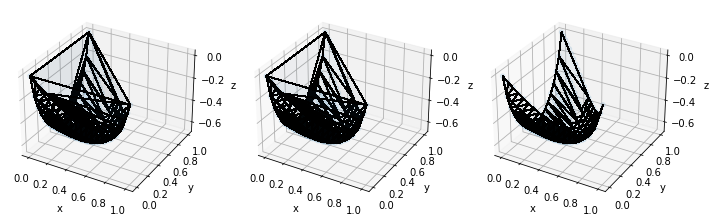

In [5]:
grid = polyphase.makegridnd(20,3)
M, chi = polyphase.get_sample_data(1)
f = lambda x : polyphase.flory_huggins(x, M, chi)
energy = np.asarray([f(x) for x in grid.T])
points = np.concatenate((grid[:-1,:].T,energy.reshape(-1,1)),axis=1)

hull = ConvexHull(points)
lower_hull, points_inf = get_lower_convexhull(points)
zlower = hull.equations[:,-2]<0

fig, axs = plt.subplots(1,3,figsize=(3*4,4),subplot_kw={'projection':'3d'})
triangles = [hull.simplices, lower_hull,hull.simplices[zlower]]
for i in range(3):
    axs[i].scatter(points[:,0], points[:,1],points[:,2],alpha=0.1)
    axs[i].plot_trisurf(points[:,0],points[:,1],points[:,2],triangles=triangles[i],
                    linewidth=1.0,edgecolor='k', antialiased=False,facecolor='grey',alpha=0.05)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].set_zlabel('z')
    
plt.show()

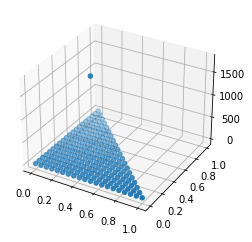

In [6]:
fig, ax = plt.subplots(subplot_kw = {'projection':'3d'})
ax.scatter(points_inf[:,0], points_inf[:,1],points_inf[:,2])
plt.show()

Computation took 5.53s


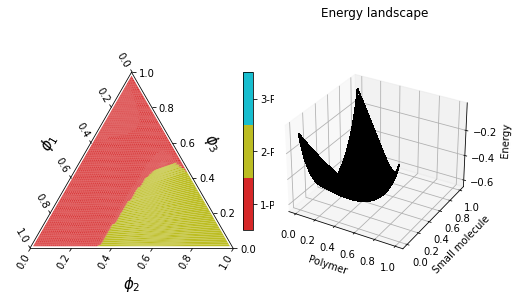

Computation took 5.44s
[3725 5049    0] 
 [[1.010102e-02 4.949495e-01 4.949495e-01]
 [1.000000e-08 1.000000e+00 1.000000e-08]
 [1.000000e-08 1.000000e-08 1.000000e+00]] 

[164  99   0] 
 [[6.4646465e-01 1.0101020e-02 3.4343435e-01]
 [1.0000000e+00 1.0000000e-08 1.0000000e-08]
 [1.0000000e-08 1.0000000e-08 1.0000000e+00]] 

[1967 5049   99] 
 [[7.7777778e-01 2.1212122e-01 1.0101020e-02]
 [1.0000000e-08 1.0000000e+00 1.0000000e-08]
 [1.0000000e+00 1.0000000e-08 1.0000000e-08]] 



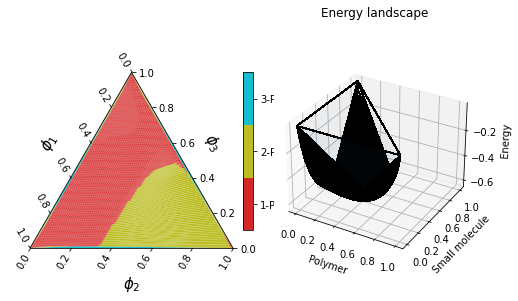

Computation took 5.46s
[3725 5049    0] 
 [[1.010102e-02 4.949495e-01 4.949495e-01]
 [1.000000e-08 1.000000e+00 1.000000e-08]
 [1.000000e-08 1.000000e-08 1.000000e+00]] 

[164  99   0] 
 [[6.4646465e-01 1.0101020e-02 3.4343435e-01]
 [1.0000000e+00 1.0000000e-08 1.0000000e-08]
 [1.0000000e-08 1.0000000e-08 1.0000000e+00]] 

[1967 5049   99] 
 [[7.7777778e-01 2.1212122e-01 1.0101020e-02]
 [1.0000000e-08 1.0000000e+00 1.0000000e-08]
 [1.0000000e+00 1.0000000e-08 1.0000000e-08]] 



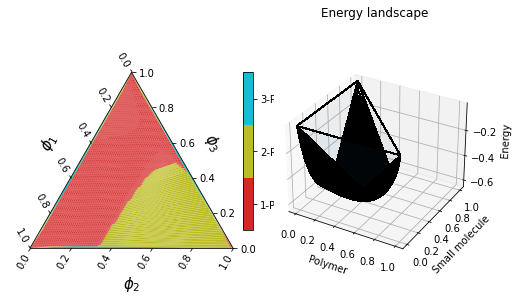

In [50]:
methods = [None, 'point_at_infinity','negative_znorm']
corrections = [1,2,2]
M, chi = polyphase.get_sample_data(1)
f = lambda x : polyphase.flory_huggins(x, M, chi)
for i in range(3):
    engine = polyphase.PHASE(f,100,len(M))
    engine.compute(correction=corrections[i], lower_hull_method=methods[i])
    phase3 = engine.simplices[np.asarray(engine.num_comps)==3]
    for p3 in phase3:
        print(p3,'\n', engine.grid[:,p3].T,'\n')
    renderer = polyphase.TernaryPlot(engine)
    fig = plt.figure(figsize=(2*4,4))
    ax = fig.add_subplot(1,2,1,projection='ternary')
    renderer.plot_simplices(ax=ax,label=True)
    ax = fig.add_subplot(1,2,2, projection='3d')
    polyphase.plot_energy_landscape(engine.as_dict(),mode='convex_hull',ax=ax)
    plt.show()

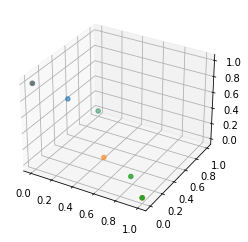

In [51]:
phase3 = engine.simplices[np.asarray(engine.num_comps)==3]
fig, ax = plt.subplots(subplot_kw = {'projection':'3d'})
for p3 in phase3:
    ax.scatter(engine.grid[0,p3],engine.grid[1,p3],engine.grid[2,p3])
plt.show()

Computation took 2.77s
Computation took 2.70s
Computation took 2.53s


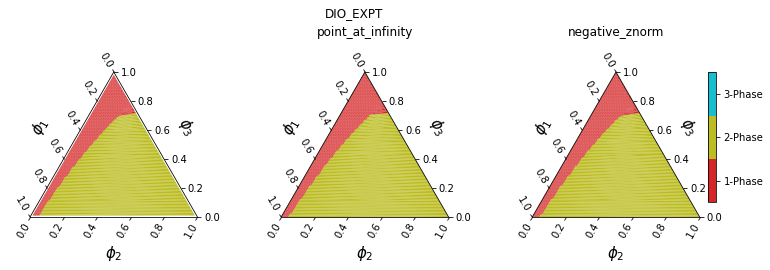

Computation took 1.04s
Computation took 1.60s
Computation took 1.10s


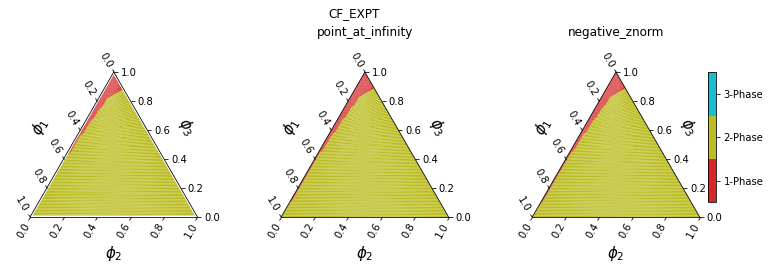

Computation took 0.86s
Computation took 1.09s
Computation took 1.18s


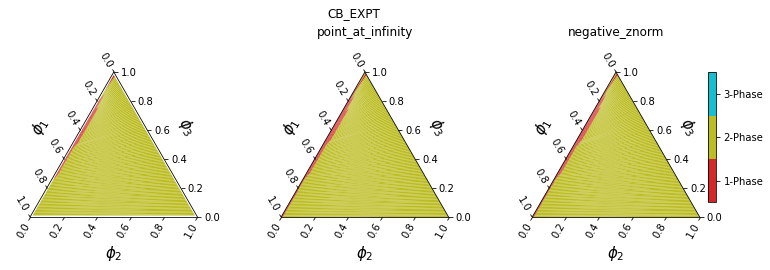

Computation took 1.09s
Computation took 1.08s
Computation took 1.12s


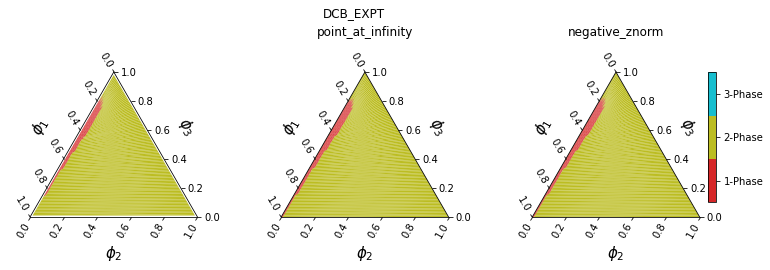

Computation took 0.89s
Computation took 1.09s
Computation took 1.23s


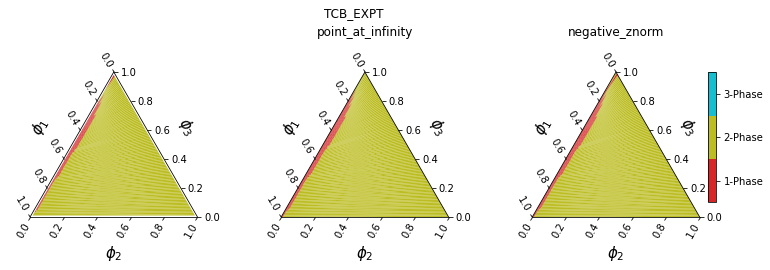

Computation took 0.92s
Computation took 1.02s
Computation took 1.01s


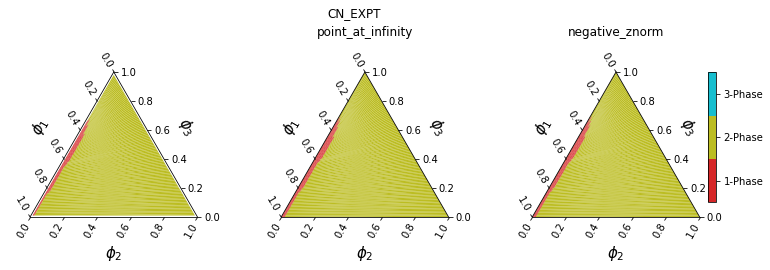

Computation took 0.63s
Computation took 0.72s
Computation took 0.71s


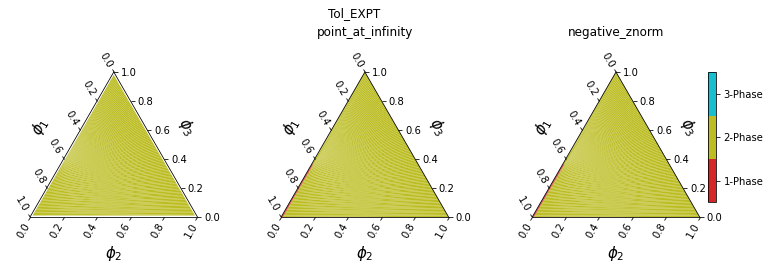

Computation took 0.50s
Computation took 0.57s
Computation took 0.64s


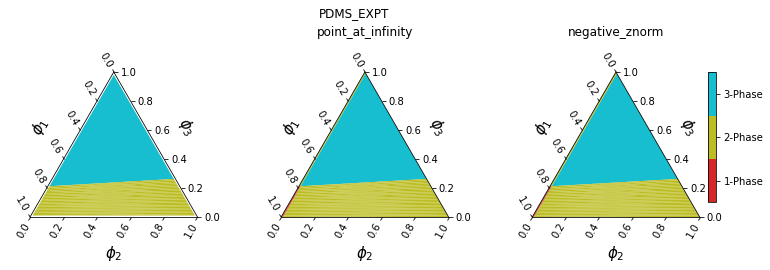

Computation took 0.45s
Computation took 0.47s
Computation took 0.57s


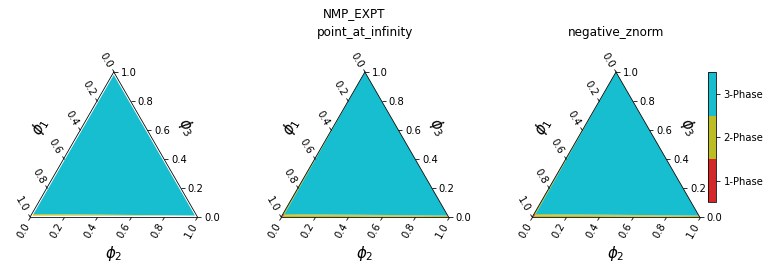

Computation took 0.46s
Computation took 0.48s
Computation took 0.56s


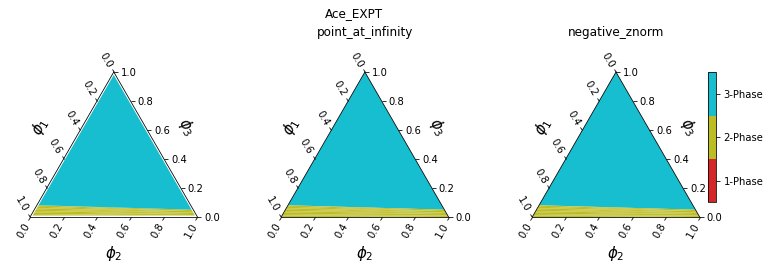

In [17]:
import pickle
import pandas as pd

dirname = '../data/hamming/pm6y6'
distmats = dirname + '/distance.pkl'

with open(distmats, 'rb') as handle:
    out = pickle.load(handle)

sys_df = out['df'].reset_index(drop=True)
for _, row in sys_df[86:].iterrows():
    M = row['dop']
    chi = [row['chi12'],row['chi13'],row['chi23']]
    f = lambda x : polyphase.flory_huggins(x, M, chi)
    fig = plt.figure(figsize=(3*4,4))
    fig.subplots_adjust(wspace=0.5)
    methods = [None,'point_at_infinity','negative_znorm']
    corrections = [1,3,3]
    for i,method in enumerate(methods):
        engine = polyphase.PHASE(f,100,len(M))
        engine.compute(correction=corrections[i], lower_hull_method=method)
        renderer = polyphase.TernaryPlot(engine)

        ax = fig.add_subplot(1,3,i+1,projection='ternary')
        ax, cbar = renderer.plot_simplices(ax=ax,label=True)
        if i!=2:
            cbar.remove()
        ax.set_title(method,pad=36)
    fig.suptitle(row['solvent'])
    plt.show()

In [ ]:
M = [1120.63, 14.40, 2.41, 1.0]
chi = [0.379,0.436,1.896, 0.583,2.393,1.320]

f = lambda x : polyphase.flory_huggins(x, M, chi)
engine = polyphase.PHASE(f,100,len(M))
for i in [1,2,3]:
    engine.compute(correction=i,refine_simplices=False)
    engine.plot()